# Factor Analysis

In [1]:
library(tidyverse)
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



In [2]:
loc = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data= read.csv(loc, header = FALSE)
head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


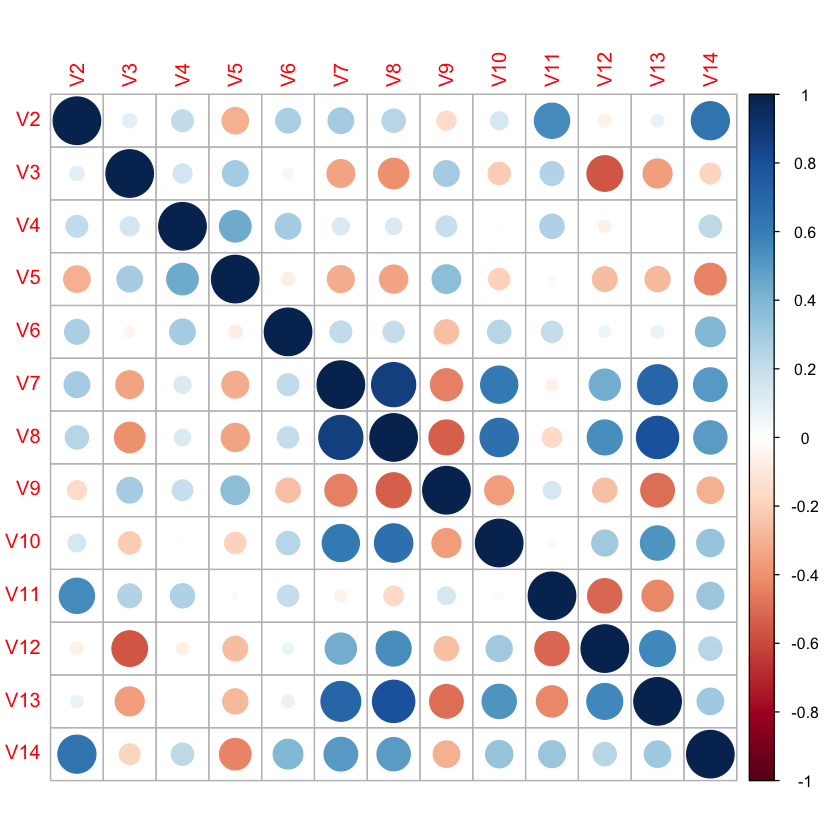

In [3]:
# Data visualization

dat = data[,-1]

#visualize the correlation matrix before we run PCA
cor.mat=cor(dat)
corrplot(round(cor.mat,2))

In [4]:
#factor analysis 
#data standardization
sdat = data.frame(scale(dat,center=TRUE,scale = TRUE))

#Function factanal (no package needed)
fit.fa = factanal(~., data=sdat, factors=7, rotation="none", na.action = na.exclude)
fit.fa


Call:
factanal(x = ~., factors = 7, data = sdat, na.action = na.exclude,     rotation = "none")

Uniquenesses:
   V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14 
0.318 0.205 0.005 0.394 0.549 0.189 0.063 0.005 0.394 0.005 0.352 0.240 0.207 

Loadings:
    Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7
V2   0.309   0.283   0.487  -0.219   0.454          -0.116 
V3   0.354  -0.377  -0.117  -0.105   0.337   0.624         
V4   0.720           0.276   0.632                         
V5   0.406  -0.390  -0.202   0.312  -0.334   0.190         
V6   0.130           0.425   0.121   0.175  -0.146   0.430 
V7  -0.184   0.690   0.470   0.238           0.142         
V8  -0.291   0.697   0.491   0.328           0.112         
V9   0.617          -0.779                                 
V10 -0.187   0.523   0.358          -0.132   0.215   0.311 
V11  0.699           0.423  -0.572                         
V12 -0.434   0.458           0.393          -0.308         

#### we need to look at loading 
#According to th results, 
#### Variable V2 = 0.309*F1 +0.283*F2+0.487*F3-0.219*F4+0.454*F5+ 0*F6-0.116 *F7

#### V2 = difficult to interpret
#### V4 = better model 

#without any rotation, the results may be difficult to interpret

#### communality of the V2 = 1-Uniquenesses: = 1-0.318 = 0.682
#(about 68% of the variance of the 2nd variable is explained by the 7 factors)
#Uniquenesses of variable "V2" =0.318

#to determine if the factor is sufficient or not
#p-value : 0.724
#this factor model is sufficient(0.724<0.05)

In [5]:
#manual calculation of the communality of variable "V2"
cm.v2 = c(.309,.283,.487,-0.219,0.454,-0.116)

#sum of squared loadings 
sum(cm.v2^2)

[1] 0.680272

In [6]:
#5 factors, is that sufficient ? 
fit.fatana = factanal(~., data=sdat, factors=5, rotation="none", na.action = na.exclude)
fit.fatana

#the p-value is 0.0206 (this is too small, more factors are needed)b


Call:
factanal(x = ~., factors = 5, data = sdat, na.action = na.exclude,     rotation = "none")

Uniquenesses:
   V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14 
0.348 0.107 0.005 0.399 0.792 0.198 0.055 0.623 0.512 0.005 0.384 0.252 0.204 

Loadings:
    Factor1 Factor2 Factor3 Factor4 Factor5
V2   0.389   0.482  -0.256   0.171   0.416 
V3  -0.514   0.272           0.739         
V4           0.784   0.616                 
V5  -0.508   0.289   0.334          -0.384 
V6   0.246   0.305                   0.218 
V7   0.854           0.192   0.155  -0.102 
V8   0.913           0.279   0.133  -0.111 
V9  -0.570   0.209                         
V10  0.648                   0.168  -0.192 
V11          0.799  -0.596                 
V12  0.500  -0.387   0.386  -0.227   0.127 
V13  0.706  -0.278   0.386   0.147         
V14  0.635   0.339                   0.524 

               Factor1 Factor2 Factor3 Factor4 Factor5
SS loadings      4.195   2.127   1.347   0.727 

In [7]:
#KMO Test
#The kaiser-meyer-olkin (KMO) test is to evaluate if data is suitable for factor analysis or not
#KMO = 0.8 (good)
#The KMO test is good, we can proceed with the factor analysis

library(psych)
KMO(dat)
#Overall MSA = 0.78
#*0.00-0.49 unacceptable
#*0.50-0.59 miserable
#*0.60-0.69 mediocre
#*0.70-0.79 middling
#*0.80-0.89 meritorious
#*0.90-0.99 marvelous

#MSA = 0.78 (middling), the data is suitable for factor analysis




Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = dat)
Overall MSA =  0.78
MSA for each item = 
  V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14 
0.73 0.80 0.44 0.68 0.68 0.87 0.81 0.83 0.85 0.62 0.79 0.87 0.82 

# Rotation

https://www.cuemath.com/algebra/rotation-matrix/


Call:
factanal(x = ~., factors = 7, data = sdat, na.action = na.exclude,     rotation = "varimax")

Uniquenesses:
   V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14 
0.318 0.205 0.005 0.394 0.549 0.189 0.063 0.005 0.394 0.005 0.352 0.240 0.207 

Loadings:
    Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7
V2   0.126   0.753   0.269           0.109                 
V3  -0.219           0.115   0.118   0.843                 
V4           0.150           0.957                   0.181 
V5  -0.198  -0.480   0.103   0.524   0.189   0.127         
V6   0.115   0.224           0.154          -0.125   0.586 
V7   0.831   0.270                  -0.163  -0.120         
V8   0.875   0.239  -0.150          -0.226  -0.194         
V9  -0.350  -0.119           0.177   0.114   0.880  -0.184 
V10  0.721                                           0.262 
V11 -0.115   0.394   0.883   0.120   0.124           0.108 
V12  0.383          -0.503          -0.486              

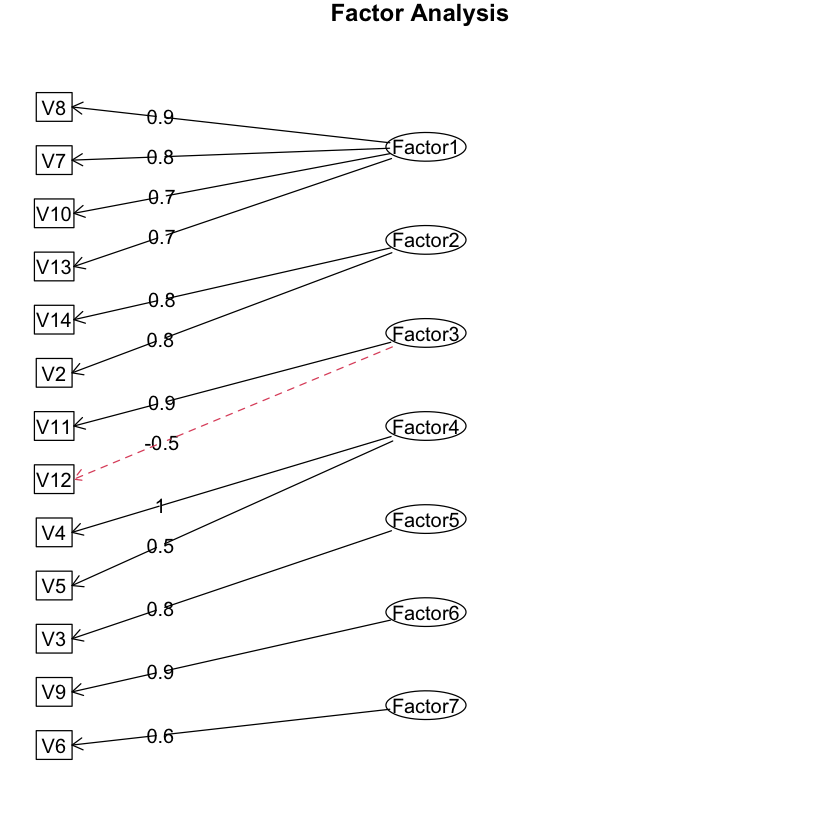

In [9]:
#function factanal ( no package is needed)
#factor analysis with 7 factors with "varimax" rotation 
fit.fatana = factanal(~.,data=sdat, factors=7, rotation="varimax", na.action = na.exclude)
fit.fatana

# F2 : some factor related to alcohol level and proline level.
# V2 = 0.126 F1 + 0.753 F2 + 0.269 F3 + 0.109 F5 

# for V10 = 0.721 F1 + 0.262 F7 
# V13 = 0.712 F1 + 0.114 F2 - 0.394 F3 + 0 F4 -0.171 F5 -0.229 F6 + 0 F7

#Visualize the loadings of the factor analysis results 

fa.diagram(fit.fatana$loadings)


#interpretation part 

V7 : Total_phenols

V8 : Flavanoids

V10 : Color_intensity

V13 : Proline


# The number of factors


Warning message in fa.parallel(x = cor1, fm = "minres", fa = "fa"):
"It seems as if you are using a correlation matrix, but have not specified the number of cases. The number of subjects is arbitrarily set to be 100  "


Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


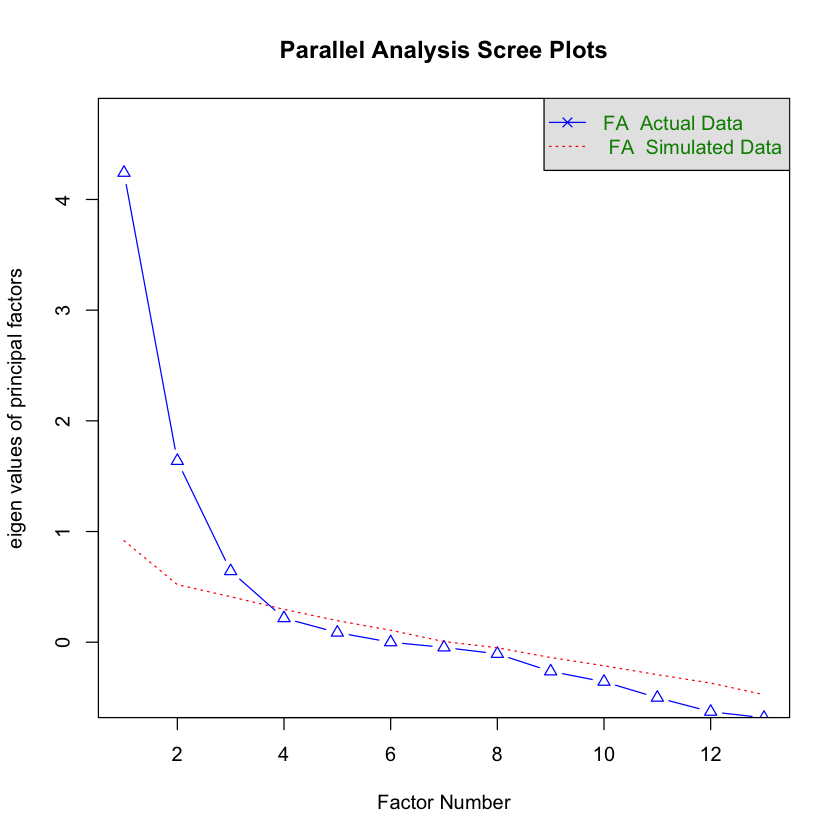

In [10]:
library(psych)

#get eigenvalues

cor1 = cor(dat,use="pairwise.complete.obs")

fa.parallel(x=cor1,fm="minres",fa="fa")



Call:
factanal(x = ~., factors = 3, data = sdat, na.action = na.exclude,     rotation = "varimax")

Uniquenesses:
   V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14 
0.387 0.727 0.522 0.073 0.837 0.199 0.069 0.658 0.555 0.246 0.503 0.252 0.384 

Loadings:
    Factor1 Factor2 Factor3
V2           0.779         
V3  -0.470           0.213 
V4           0.285   0.629 
V5  -0.300  -0.322   0.856 
V6   0.126   0.373         
V7   0.824   0.347         
V8   0.928   0.265         
V9  -0.533  -0.144   0.193 
V10  0.622   0.230         
V11 -0.413   0.748   0.157 
V12  0.654  -0.202  -0.172 
V13  0.864                 
V14  0.355   0.688  -0.129 

               Factor1 Factor2 Factor3
SS loadings      4.009   2.277   1.302
Proportion Var   0.308   0.175   0.100
Cumulative Var   0.308   0.484   0.584

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 158.55 on 42 degrees of freedom.
The p-value is 1.96e-15 

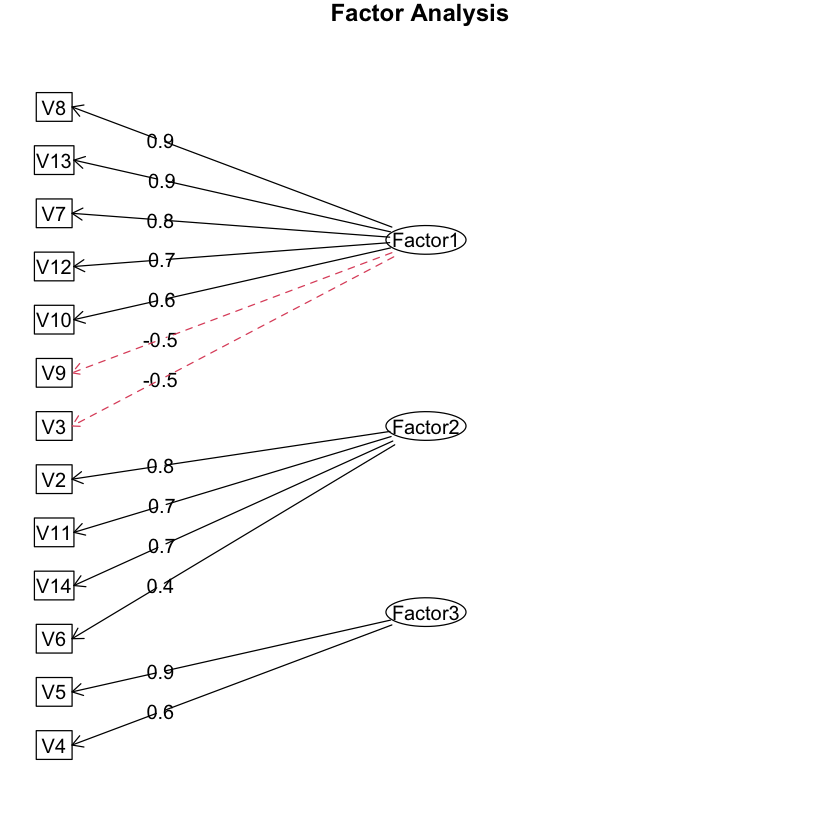

In [14]:
#parallel analysis
fit.fa3= factanal(~., data=sdat,factors = 3, rotation = "varimax", na.action = na.exclude)
fit.fa3

fa.diagram(fit.fa3$loadings)

# 3 factors =
# V2= 0.779

Uniquenesses:

   V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14 
   
0.387 0.727 0.522 0.073 0.837 0.199 0.069 0.658 0.555 0.246 0.503 0.252 0.384 

Uniquenesses:

   V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14 

   
0.318 0.205 0.005 0.394 0.549 0.189 0.063 0.005 0.394 0.005 0.352 0.240 0.207 
